In [1]:
#     AUTHOR:     ERYL KENN VICTORINO
#     PURPOSE:    THOMPSON SAMPLING TUTORIAL
#                 from 'Machine Learning A-Z™: Hands-On Python & R In Data Science' on Udemy
#                 by Kirill Eremenko, Hadelin de Ponteves, and the SuperDataScience Team
#     MOD DATE:   3/31/2019

In [2]:
#   IMPORT LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
#   IMPORT DATASET
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
#   IMPLEMENT RANDOM SELECTION (FOR COMPARISON)
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

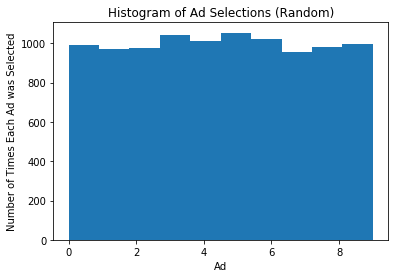

In [5]:
#   VISUALIZE RANDOM SELECTION (FOR COMPARISON)
plt.hist(ads_selected)
plt.title('Histogram of Ad Selections (Random)')
plt.xlabel('Ad')
plt.ylabel('Number of Times Each Ad was Selected')
plt.show()

In [6]:
#   IMPLEMENT THOMPSON SAMPLING
N = dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

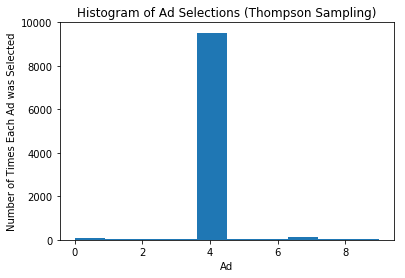

In [7]:
#   VISUALIZE THOMPSON SAMPLING
plt.hist(ads_selected)
plt.title('Histogram of Ad Selections (Thompson Sampling)')
plt.xlabel('Ad')
plt.ylabel('Number of Times Each Ad was Selected')
plt.show()